In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./FER_data.csv')

print(data.head())

pixels = data['pixels'].values
emotions = data['emotion'].values

X = np.array([np.fromstring(pixel, sep=' ') for pixel in pixels], dtype=np.float32)
X = X.reshape(-1, 48, 48)

   Unnamed: 0  emotion     usage  \
0           0  neutral  Training   
1           1  neutral  Training   
2           2  neutral  Training   
3           3  neutral  Training   
4           4  neutral  Training   

                                              pixels  
0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  
1  151 150 147 155 148 133 111 140 170 174 182 15...  
2  231 212 156 164 174 138 161 173 182 200 106 38...  
3  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  
4  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  


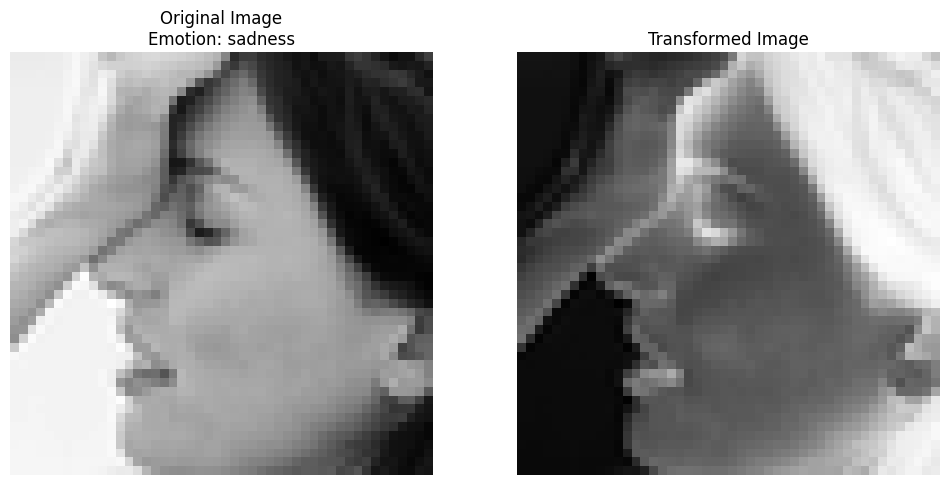

In [2]:
from torchvision import transforms
from PIL import Image

index = np.random.randint(0, len(X))
image = X[index]
label = emotions[index]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f"Original Image\nEmotion: {label}")
plt.axis('off')


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.Resize((48, 48)),
])


transformed_image = transform(image)


transformed_image_np = np.array(transformed_image)


plt.subplot(1, 2, 2)
plt.imshow(transformed_image_np, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()

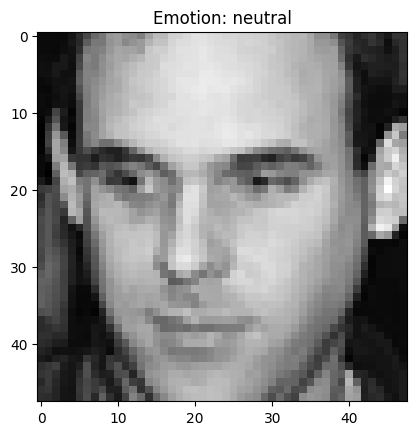

In [12]:
index = np.random.randint(0, len(X))
image = X[index]
label = emotions[index]

plt.imshow(image, cmap='gray')
plt.title(f"Emotion: {label}")
plt.show()

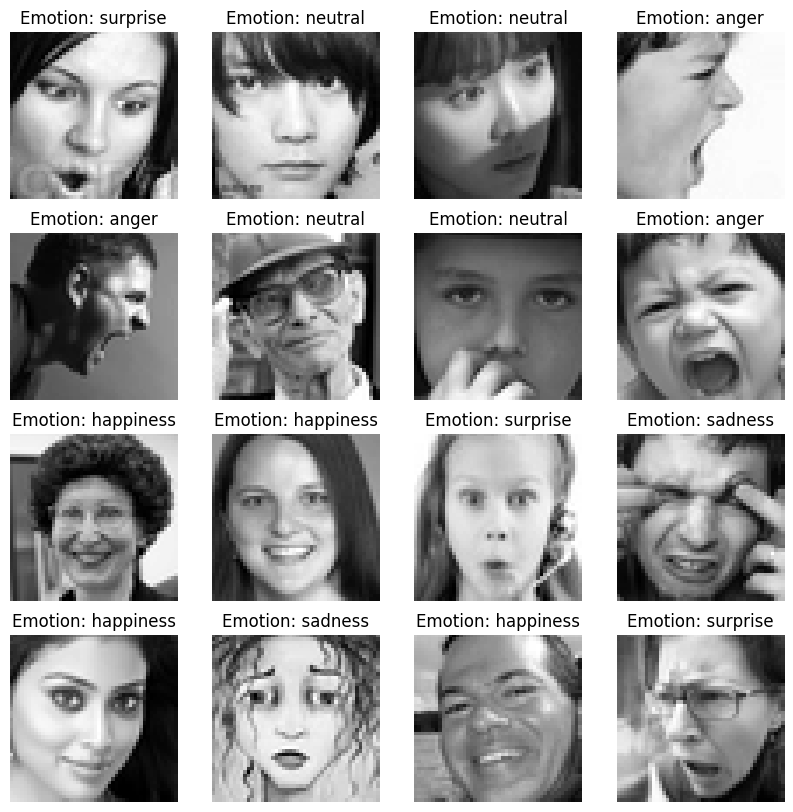

In [4]:
plt.figure(figsize=(10, 10))
for i in range(16):
    index = np.random.randint(0, len(X))
    image = X[index]
    label = emotions[index]
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Emotion: {label}")
    plt.axis('off')

plt.show()

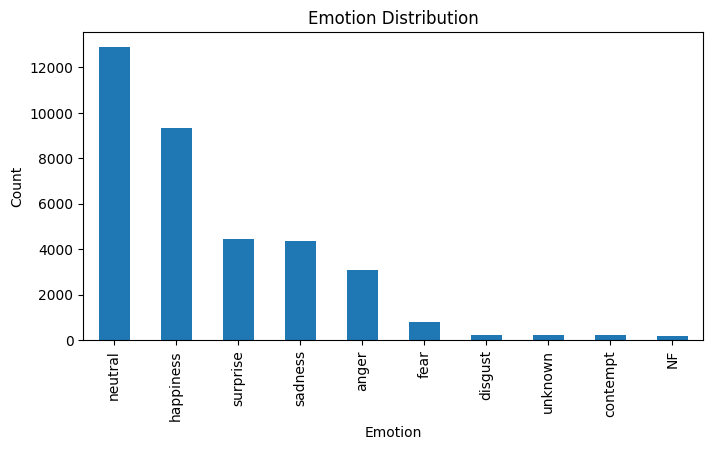

In [3]:
emotion_counts = pd.Series(emotions).value_counts()

plt.figure(figsize=(8, 4))
emotion_counts.plot(kind='bar')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

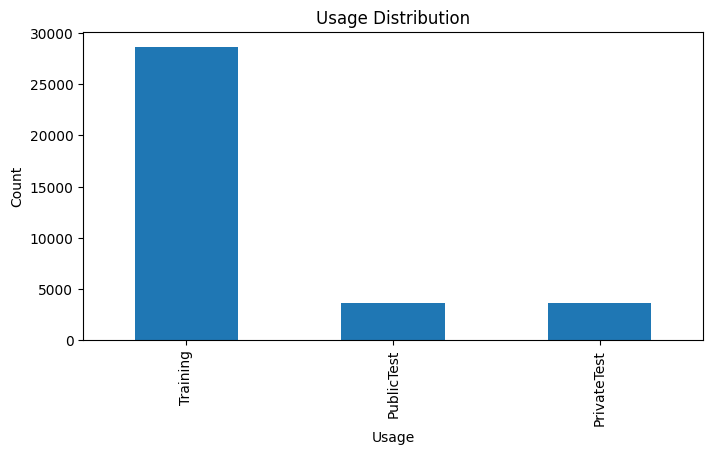

In [3]:
usage_counts = data['usage'].value_counts()

plt.figure(figsize=(8, 4))
usage_counts.plot(kind='bar')
plt.title("Usage Distribution")
plt.xlabel("Usage")
plt.ylabel("Count")
plt.show()